In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#Correlation

In [ ]:
correlation = gold_data.corr(numeric_only=True)

#Matplot

<Axes: >

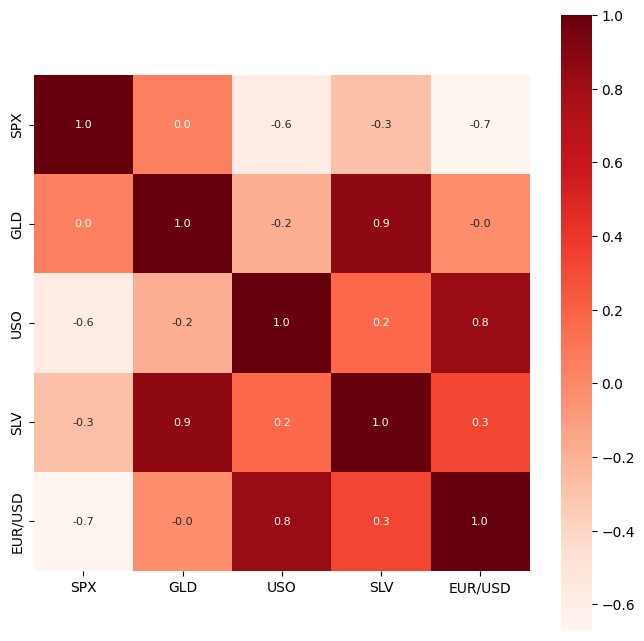

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


#Distplot

<ipython-input-18-c6417c6abb63>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

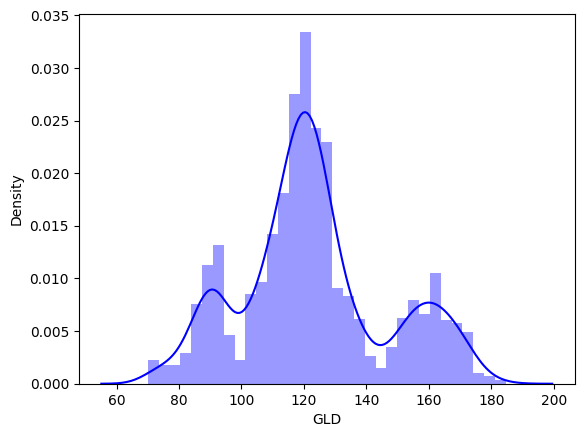

In [ ]:
sns.distplot(gold_data['GLD'],color='blue')

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

#Model Training: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

#Model Evaluation

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.50019946  82.13330015 115.9152006  127.65240073 120.69560132
 154.59939799 150.42529904 126.17180042 117.39879872 126.13310072
 116.68520085 171.85930081 141.41949866 167.81189866 114.99969989
 117.60730053 138.5036029  169.87330038 159.21750356 158.70929964
 155.12580009 125.59550035 176.8256992  157.44760391 125.24530018
  94.02199985  77.87480023 120.43999991 119.10479928 167.45619933
  88.18260072 125.20789957  91.18390105 117.82000022 121.15569896
 136.17920077 115.36240128 115.38680078 148.78390031 107.077301
 104.49390221  87.32409792 126.47090065 118.00789997 153.1395992
 119.64400017 108.29910021 108.08739839  93.13280105 127.17699785
  75.34370021 113.63969951 121.17050036 111.33139936 118.87989869
 120.93219927 159.42830021 167.77880128 147.2408969   85.97399902
  94.17140035  86.79959922  90.6082999  119.06260072 126.43960038
 127.58050006 169.74659999 122.30529932 117.36309924  98.38540011
 168.46650076 143.14289879 132.24480167 121.13640188 121.05539926
 119.63400043

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891977279815445


In [ ]:
Y_test = list(Y_test)

#Actual VS Predicted Price plot

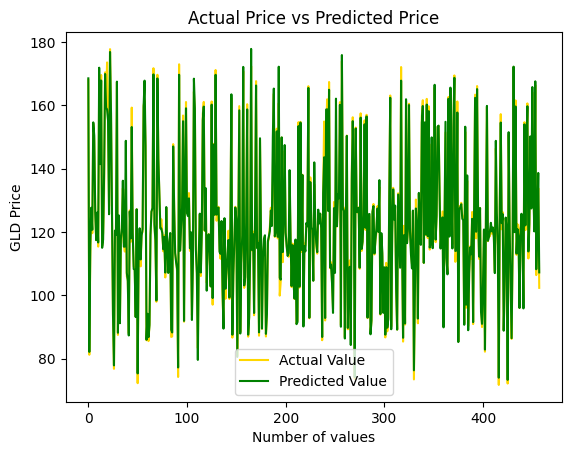

In [ ]:
plt.plot(Y_test, color='gold', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

#Classification metrics

In [ ]:
threshold = 140 # Example Threshold. Adjust as needed.
Y_test_classified = [1 if price > threshold else 0 for price in Y_test] #1 for High, 0 for low
test_data_prediction_classified = [1 if price > threshold else 0 for price in test_data_prediction]


#Confusion Matrix


Confusion Matrix:


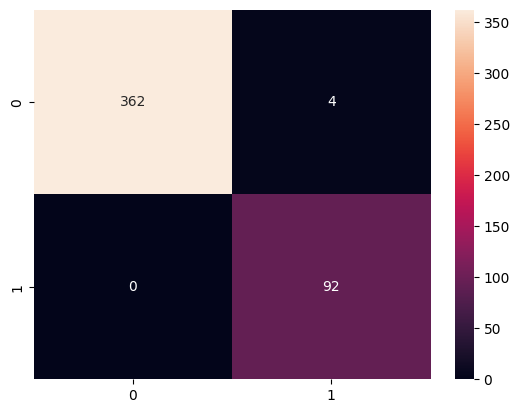

In [ ]:
cm = confusion_matrix(Y_test_classified, test_data_prediction_classified)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


#Classification Report


In [ ]:
print("Classification Report:")
print(classification_report(Y_test_classified, test_data_prediction_classified))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       366
           1       0.95      1.00      0.97        92

    accuracy                           0.99       458
   macro avg       0.97      0.99      0.98       458
weighted avg       0.99      0.99      0.99       458



# Calculate accuracy


In [ ]:
accuracy = metrics.accuracy_score(Y_test_classified, test_data_prediction_classified)
print("Accuracy:", accuracy)

Accuracy: 0.9890829694323144


#Calculate precision

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(Y_test_classified, test_data_prediction_classified)
recall = recall_score(Y_test_classified, test_data_prediction_classified)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.9484536082474226
Recall: 1.0
